In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
sys.path.append('/Users/cv/dsi/case_studies/supervised-learning-case-study')
print(str(sys))
from src.clean_df import clean_df
from src.clean_df import clean
from sklearn.linear_model import LogisticRegression

# /Users/cv/dsi/case_studies/supervised-learning-case-study/data/churn_train.csv

<module 'sys' (built-in)>


In [80]:
df_raw = clean(pd.read_csv('../data/churn_train.csv'))
# df_raw = clean_df(df_raw)

In [81]:
df_raw.active_user.sum()/40000

0.3758

df_raw.active_user.sum()/40000

In [95]:
# df_raw

In [83]:
# df_test = clean_df(df_raw)

In [84]:
df_test = df_raw

In [96]:
df_test

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active_user
0,6.94,5.0,5.000000,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,0
1,8.06,5.0,5.000000,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,0
2,21.50,4.0,4.601697,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,0
3,9.46,5.0,4.601697,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,0
4,13.77,5.0,4.601697,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,0
5,14.51,5.0,4.601697,1.00,Astapor,2014-04-22,iPhone,2014-01-29,0.0,0,True,100.0,0
6,4.87,4.7,4.000000,1.00,Astapor,2014-04-21,Android,2014-01-18,0.0,0,False,66.7,0
7,1.78,4.0,5.000000,1.00,Winterfell,2014-01-12,iPhone,2014-01-11,0.0,3,False,0.0,0
8,6.87,5.0,4.700000,1.00,Astapor,2014-01-30,Android,2014-01-01,0.0,3,False,66.7,0
9,2.41,5.0,3.000000,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,1,False,100.0,0


In [85]:
df_test.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,active_user
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382,0.375800
std,5.708056,0.447180,0.562407,0.222427,20.014008,3.811289,37.089619,0.484335
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000,0.000000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000,0.000000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000


In [87]:
# df_test

In [88]:
df_test.avg_rating_by_driver[df_test.avg_rating_by_driver.isna()]

Series([], Name: avg_rating_by_driver, dtype: float64)

In [98]:
df_corr = df_test.corr()
df_corr

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active_user
avg_dist,1.000000,0.081380,0.030450,-0.079488,-0.102349,-0.135228,0.025824,0.097445,-0.093371
avg_rating_by_driver,0.081380,1.000000,0.097762,0.007777,0.018709,-0.039264,0.010283,0.021471,-0.027415
avg_rating_of_driver,0.030450,0.097762,1.000000,-0.027851,-0.008782,-0.013426,0.001615,0.011373,-0.011982
avg_surge,-0.079488,0.007777,-0.027851,1.000000,0.793842,-0.001829,-0.075544,-0.113054,-0.003146
surge_pct,-0.102349,0.018709,-0.008782,0.793842,1.000000,0.004746,-0.103531,-0.147969,0.011551
trips_in_first_30_days,-0.135228,-0.039264,-0.013426,-0.001829,0.004746,1.000000,0.114741,0.049731,0.210677
luxury_car_user,0.025824,0.010283,0.001615,-0.075544,-0.103531,0.114741,1.000000,0.033478,0.206902
weekday_pct,0.097445,0.021471,0.011373,-0.113054,-0.147969,0.049731,0.033478,1.000000,0.008383
active_user,-0.093371,-0.027415,-0.011982,-0.003146,0.011551,0.210677,0.206902,0.008383,1.000000


In [90]:
df_test.dtypes

avg_dist                         float64
avg_rating_by_driver             float64
avg_rating_of_driver             float64
avg_surge                        float64
city                              object
last_trip_date            datetime64[ns]
phone                             object
signup_date               datetime64[ns]
surge_pct                        float64
trips_in_first_30_days             int64
luxury_car_user                     bool
weekday_pct                      float64
active_user                        int64
dtype: object

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

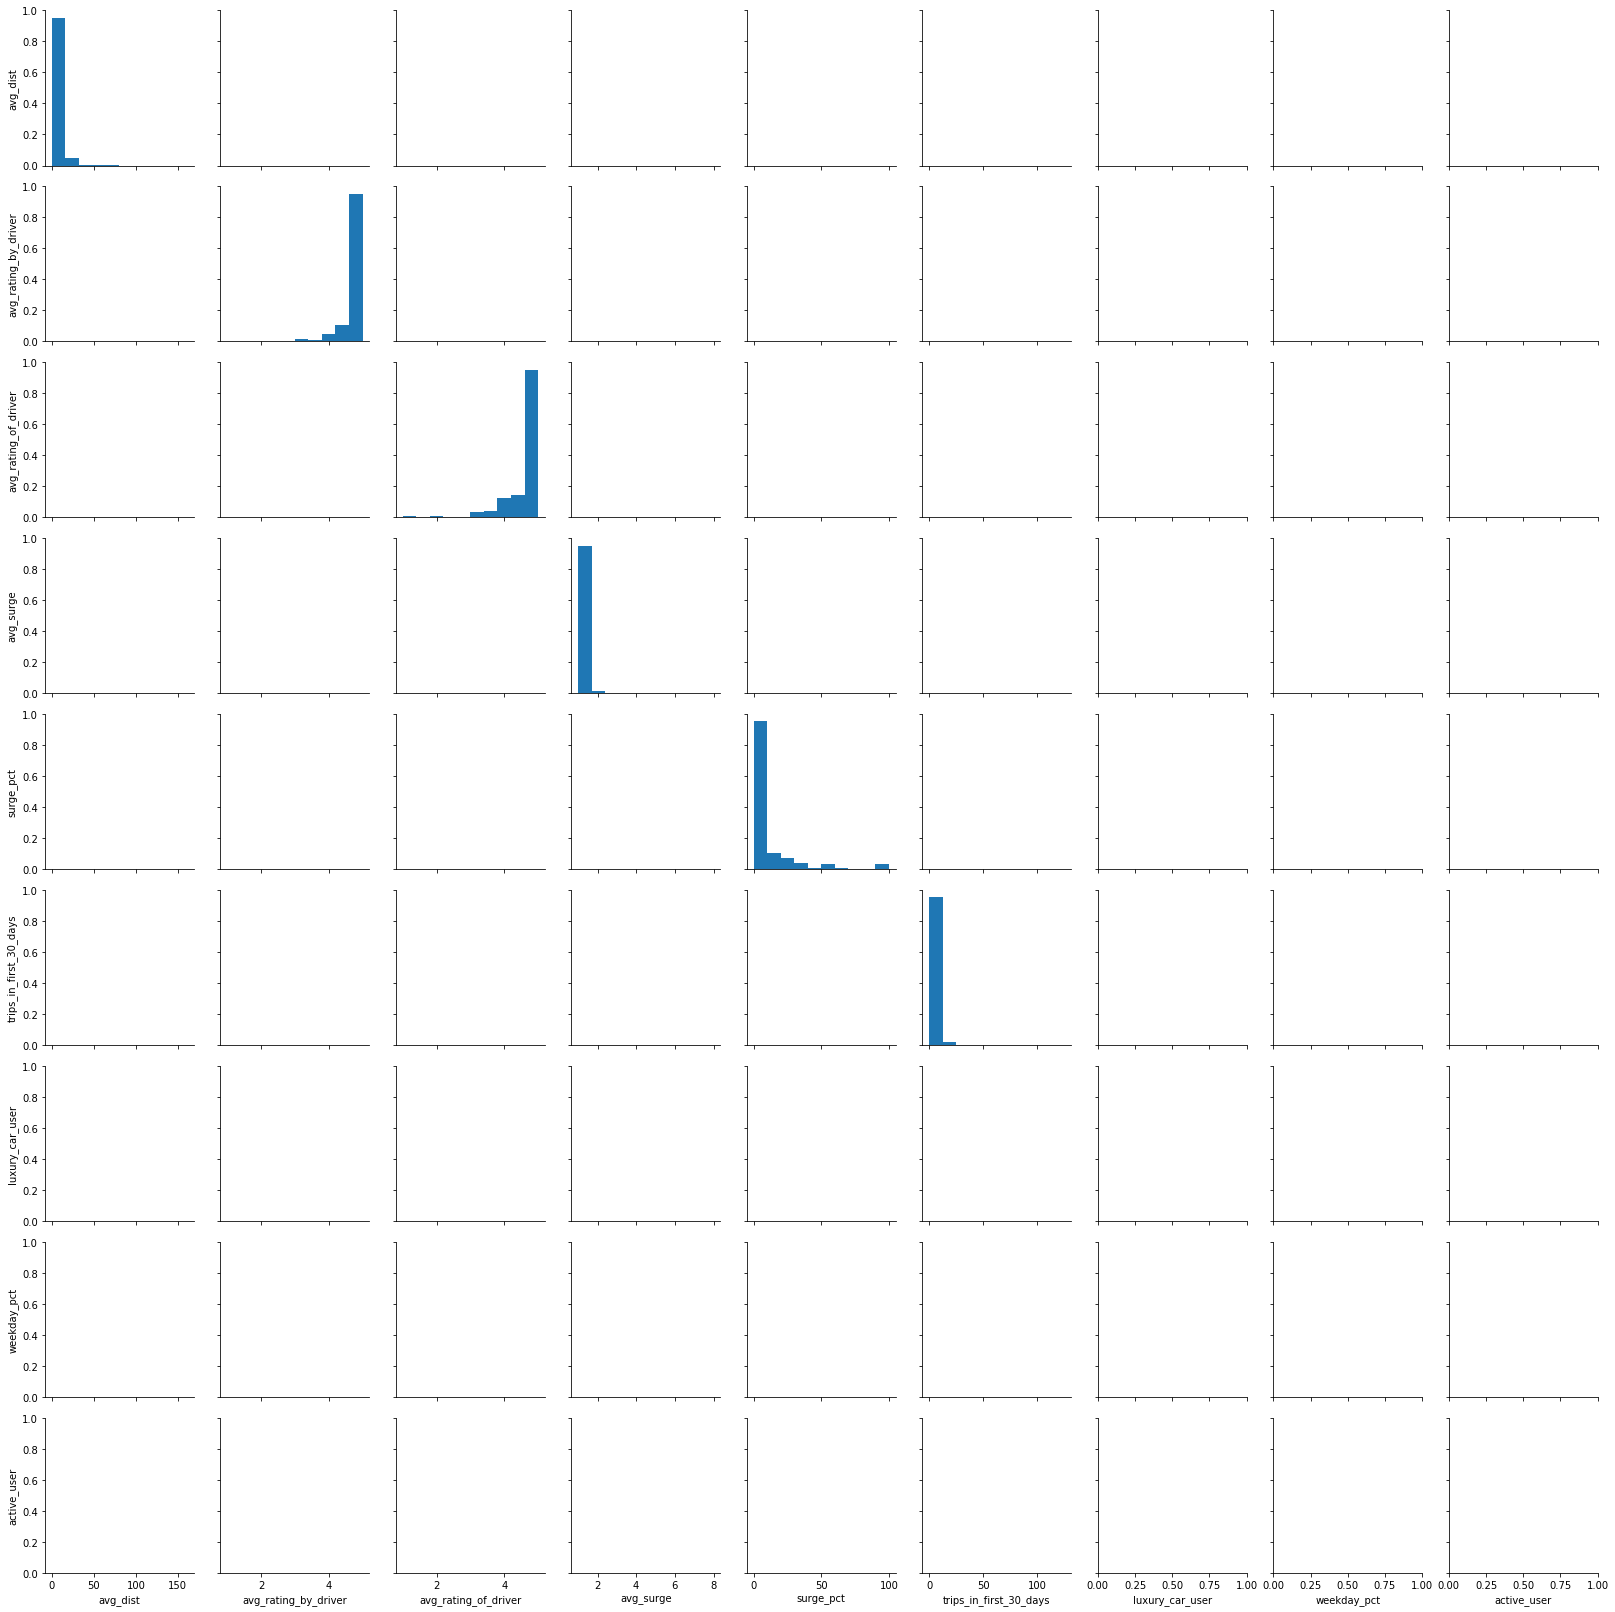

In [92]:

sns.pairplot(df_test.drop(["last_trip_date", "signup_date"], axis=1))
plt.style.use('fivethirtyeight')
sns.plt.show()


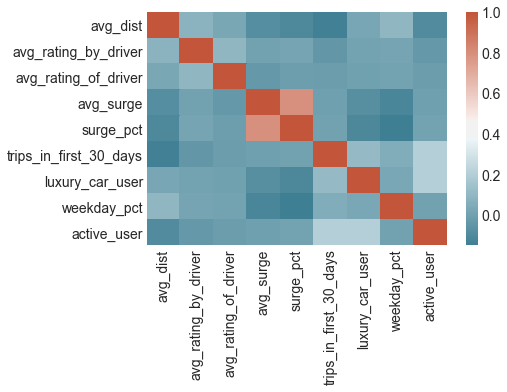

In [108]:
color_map = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_corr, cmap=color_map)
sns.set_style('whitegrid')
# sns.style.use('whitegrid')
# sns.show()